# Clustering Users

## IMPORTS

In [8]:
import pandas as pd
import numpy as np
import pickle
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

## Import Database

In [2]:
df_users = pd.read_csv("../data/users_final_dataset.csv", low_memory=False)

In [3]:
df_users.shape

(198895, 102)

In [11]:
df_users.columns.tolist()

['id',
 'nb_fiche_outils',
 'nb_guide_pratique',
 'nb_transition_ecologique',
 'nb_sante_mentale',
 'nb_ecole_inclusive',
 'nb_cps',
 'nb_reussite_tous_eleves',
 'total_interactions_x',
 'diversite_contenus',
 'nb_vote',
 'nb_comments',
 'nb_opened_mail',
 'nb_clicked_mail',
 'statut_infolettre',
 'statut_mailchimp',
 'code_postal',
 'departement',
 'academie',
 'anciennete',
 'created_at',
 'degre',
 'maternelle',
 'elementaire',
 'college',
 'lycee',
 'lycee_pro',
 'autre',
 'type_etab',
 'discipline',
 'niveau_tps',
 'niveau_ps',
 'niveau_ms',
 'niveau_gs',
 'niveau_cp',
 'niveau_ce1',
 'niveau_ce2',
 'niveau_cm1',
 'niveau_cm2',
 'niveau_6e',
 'niveau_5e',
 'niveau_4e',
 'niveau_3e',
 'niveau_2nde',
 'niveau_1ere',
 'niveau_terminale',
 'niveau_cap',
 'niveau_bac_pro',
 'niveau_post_bac',
 'niveau_segpa',
 'niveau_ash',
 'niveau_direction',
 'niveau_formateur',
 'niveau_documentaliste',
 'join_date',
 'last_action_date',
 'total_interactions_y',
 'week_minus_0',
 'week_minus_1',
 '

In [6]:
df_users.describe()

,id,nb_fiche_outils,nb_guide_pratique,nb_transition_ecologique,nb_sante_mentale,nb_ecole_inclusive,nb_cps,nb_reussite_tous_eleves,total_interactions_x,diversite_contenus,...,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_count
count,198895.000000,198895.000000,198895.000000,198895.000000,198895.000000,198895.000000,198895.000000,198895.000000,198895.000000,198895.000000,...,198895.000000,198895.000000,198895.000000,198895.000000,198895.000000,198895.000000,198895.000000,198895.000000,198895.000000,198895.000000
mean,104945.526444,1.514296,0.467986,0.019136,0.028100,0.105468,0.174414,0.557711,2.022409,1.718671,...,0.028080,0.004314,0.011845,0.041902,0.047890,0.017773,0.006526,0.051268,0.075336,0.956439
std,59569.467391,10.644729,1.652714,0.346598,0.392225,0.891159,0.963484,2.505197,11.727008,8.536877,...,0.327926,0.074917,0.125729,0.323827,0.566053,0.253091,0.108826,0.289125,0.411439,1.730818
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54167.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,105124.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,155720.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,210720.000000,1761.000000,291.000000,86.000000,66.000000,169.000000,114.000000,387.000000,2052.000000,614.000000,...,21.000000,6.000000,11.000000,23.000000,45.000000,33.000000,14.000000,8.000000,19.000000,17.000000


## Explorate for clustering

In [13]:
df = df_users.copy()

In [22]:
engagement_features = [
    'nb_fiche_outils', 'nb_guide_pratique', 'nb_transition_ecologique',
    'nb_sante_mentale', 'nb_ecole_inclusive', 'nb_cps', 'nb_reussite_tous_eleves',
    'total_interactions_x', 'diversite_contenus', 'total_interactions_y',
    'nb_vote', 'nb_comments', 'nb_opened_mail', 'nb_clicked_mail'
]

engagement_stats = df[engagement_features].describe()
print(engagement_stats.round(2))
        

       nb_fiche_outils  nb_guide_pratique  nb_transition_ecologique  \
count        198895.00          198895.00                 198895.00   
mean              1.51               0.47                      0.02   
std              10.64               1.65                      0.35   
min               0.00               0.00                      0.00   
25%               0.00               0.00                      0.00   
50%               0.00               0.00                      0.00   
75%               0.00               0.00                      0.00   
max            1761.00             291.00                     86.00   

       nb_sante_mentale  nb_ecole_inclusive     nb_cps  \
count         198895.00           198895.00  198895.00   
mean               0.03                0.11       0.17   
std                0.39                0.89       0.96   
min                0.00                0.00       0.00   
25%                0.00                0.00       0.00   
50%         

In [23]:
df['activity_level'] = 'inactive'
df.loc[df['total_interactions_y'] > 0, 'activity_level'] = 'email_only'
df.loc[df['total_interactions_x'] > 0, 'activity_level'] = 'platform_active'

activity_distribution = df['activity_level'].value_counts()
print("Distribution des niveaux d'activité:")
for level, count in activity_distribution.items():
    pct = count / len(df) * 100
    print(f"  {level}: {count:,} ({pct:.1f}%)")

email_vs_platform = pd.crosstab(
    df['nb_opened_mail'] > 0,
    df['total_interactions_x'] > 0,
    margins=True
)
print("Ouvert email vs Actif plateforme:")
print(email_vs_platform)

print(f"total_interactions_x (plateforme): moyenne={df['total_interactions_x'].mean():.1f}")
print(f"total_interactions_y (global): moyenne={df['total_interactions_y'].mean():.1f}")

# Corrélation entre les deux
correlation = df['total_interactions_x'].corr(df['total_interactions_y'])
print(f"Corrélation entre les deux: {correlation:.3f}")

# Utilisateurs avec beaucoup d'email mais peu de plateforme (segment clé !)
email_heavy = df[(df['nb_opened_mail'] > 20) & (df['total_interactions_x'] <= 2)]
print(f"\nUtilisateurs 'email-heavy, platform-light': {len(email_heavy):,} ({len(email_heavy)/len(df)*100:.1f}%)")

Distribution des niveaux d'activité:
  email_only: 114,309 (57.5%)
  platform_active: 76,220 (38.3%)
  inactive: 8,366 (4.2%)
Ouvert email vs Actif plateforme:
total_interactions_x   False   True     All
nb_opened_mail                             
False                  22759   7610   30369
True                   99916  68610  168526
All                   122675  76220  198895
total_interactions_x (plateforme): moyenne=2.0
total_interactions_y (global): moyenne=79.9
Corrélation entre les deux: 0.036

Utilisateurs 'email-heavy, platform-light': 56,803 (28.6%)


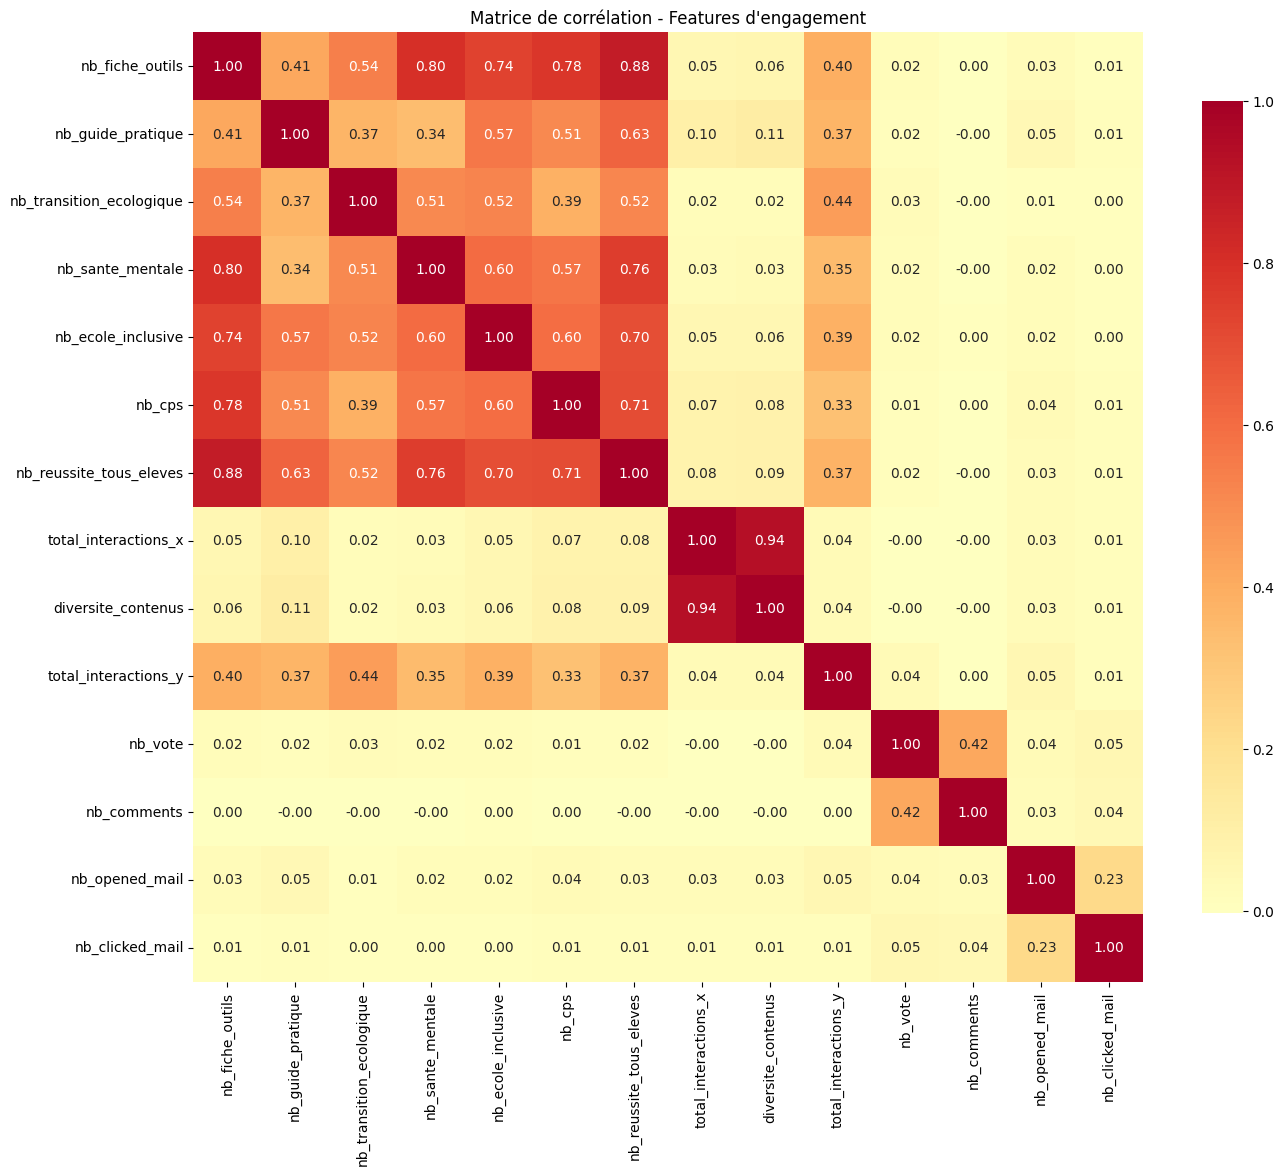


=== CORRÉLATIONS FORTES (>0.7) ===
nb_fiche_outils ↔ nb_sante_mentale: 0.797
nb_fiche_outils ↔ nb_ecole_inclusive: 0.737
nb_fiche_outils ↔ nb_cps: 0.775
nb_fiche_outils ↔ nb_reussite_tous_eleves: 0.877
nb_sante_mentale ↔ nb_reussite_tous_eleves: 0.755
nb_cps ↔ nb_reussite_tous_eleves: 0.708
total_interactions_x ↔ diversite_contenus: 0.937

=== FOCUS SUR LES INTERACTIONS ===
total_interactions_x ↔ total_interactions_y: 0.036
total_interactions_x ↔ diversite_contenus: 0.937


In [25]:
engagement_features = [
    'nb_fiche_outils', 'nb_guide_pratique', 'nb_transition_ecologique',
    'nb_sante_mentale', 'nb_ecole_inclusive', 'nb_cps', 'nb_reussite_tous_eleves',
    'total_interactions_x', 'diversite_contenus', 'total_interactions_y',
    'nb_vote', 'nb_comments', 'nb_opened_mail', 'nb_clicked_mail'
]

corr_matrix = df[engagement_features].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Matrice de corrélation - Features d\'engagement')
plt.tight_layout()
plt.show()

# Identifier les corrélations fortes (> 0.7 ou < -0.7)
print(f"\n=== CORRÉLATIONS FORTES (>0.7) ===")
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr_pairs.append({
                'feature1': corr_matrix.columns[i],
                'feature2': corr_matrix.columns[j],
                'correlation': corr_val
            })


for pair in high_corr_pairs:
    print(f"{pair['feature1']} ↔ {pair['feature2']}: {pair['correlation']:.3f}")

print(f"\n=== FOCUS SUR LES INTERACTIONS ===")
print(f"total_interactions_x ↔ total_interactions_y: {corr_matrix.loc['total_interactions_x', 'total_interactions_y']:.3f}")
print(f"total_interactions_x ↔ diversite_contenus: {corr_matrix.loc['total_interactions_x', 'diversite_contenus']:.3f}")

In [26]:
topic_features = [col for col in df.columns if col.startswith('topic_')]
print(f"Nombre de topics: {len(topic_features)}")

# Statistiques des topics
topic_stats = df[topic_features].describe()
print("\n📚 TOPICS LES PLUS POPULAIRES:")
topic_means = topic_stats.loc['mean'].sort_values(ascending=False)
print(topic_means.head(10))

print("\n📚 TOPICS AVEC LE PLUS DE VARIANCE (diversité):")
topic_vars = df[topic_features].var().sort_values(ascending=False)
print(topic_vars.head(10))

# Pourcentage d'utilisateurs touchés par chaque topic
print(f"\n📚 COUVERTURE DES TOPICS (% utilisateurs > 0):")
topic_coverage = {}
for topic in topic_features:
    coverage = (df[topic] > 0).mean() * 100
    topic_coverage[topic] = coverage

topic_coverage_sorted = sorted(topic_coverage.items(), key=lambda x: x[1], reverse=True)
for topic, coverage in topic_coverage_sorted[:10]:
    print(f"  {topic}: {coverage:.1f}% des utilisateurs")

# Analyse du topic_count
print(f"\n📚 TOPIC_COUNT (diversité thématique):")
print(f"  Moyenne: {df['topic_count'].mean():.2f}")
print(f"  Médiane: {df['topic_count'].median():.2f}")
print(f"  Max: {df['topic_count'].max():.0f}")
print(f"  % avec 0 topics: {(df['topic_count'] == 0).mean()*100:.1f}%")

# Corrélation topic_count avec l'engagement
engagement_simple = ['total_interactions_x', 'total_interactions_y', 'diversite_contenus']
print(f"\n📚 CORRÉLATIONS TOPIC_COUNT avec ENGAGEMENT:")
for eng_feature in engagement_simple:
    corr = df['topic_count'].corr(df[eng_feature])
    print(f"  topic_count ↔ {eng_feature}: {corr:.3f}")

Nombre de topics: 18

📚 TOPICS LES PLUS POPULAIRES:
topic_-1       1.067417
topic_count    0.956439
topic_0        0.357621
topic_1        0.263104
topic_2        0.128646
topic_15       0.075336
topic_5        0.066452
topic_14       0.051268
topic_11       0.047890
topic_10       0.041902
Name: mean, dtype: float64

📚 TOPICS AVEC LE PLUS DE VARIANCE (diversité):
topic_-1       20.412526
topic_0         3.814986
topic_count     2.995729
topic_1         1.298459
topic_2         0.611398
topic_11        0.320416
topic_5         0.190557
topic_15        0.169282
topic_7         0.107536
topic_10        0.104864
dtype: float64

📚 COUVERTURE DES TOPICS (% utilisateurs > 0):
  topic_count: 41.7% des utilisateurs
  topic_-1: 32.9% des utilisateurs
  topic_0: 13.4% des utilisateurs
  topic_1: 12.4% des utilisateurs
  topic_2: 6.9% des utilisateurs
  topic_15: 5.4% des utilisateurs
  topic_5: 4.4% des utilisateurs
  topic_14: 3.9% des utilisateurs
  topic_10: 2.8% des utilisateurs
  topic_4: 2

In [21]:
# Maintenant qu'on a exploré, faisons les choix de features
print("=== SYNTHÈSE POUR SÉLECTION DE FEATURES ===")

# 1. FEATURES D'ENGAGEMENT - Décisions basées sur corrélations
print("1️⃣ FEATURES D'ENGAGEMENT:")
print("✅ À GARDER:")
print("  - total_interactions_y (email + global)")
print("  - nb_opened_mail, nb_clicked_mail (email behavior)")
print("  - nb_fiche_outils (feature principale, corrélée aux défis)")
print("  - Un seul des défis prioritaires (nb_reussite_tous_eleves - le plus corrélé)")

print("❌ À SUPPRIMER:")
print("  - total_interactions_x (redondant avec diversite_contenus)")
print("  - diversite_contenus (corrélation 0.937 avec total_interactions_x)")
print("  - Autres défis prioritaires (corrélés avec nb_fiche_outils)")
print("  - nb_vote, nb_comments (trop de zéros)")

# 2. FEATURES TEMPORELLES
print("\n2️⃣ FEATURES TEMPORELLES:")
print("✅ À GARDER (post-correction du bug temporel):")
print("  - 3-4 semaines récentes (après correction)")
print("  - 2-3 mois récents")
print("  - 1-2 années (pour la profondeur historique)")

# 3. FEATURES TOPICS
print("\n3️⃣ FEATURES TOPICS:")
print("✅ À GARDER:")
print("  - topic_count (diversité thématique)")
print("  - Top 5-6 topics avec plus de variance:")
for topic, var in df[topic_features].var().sort_values(ascending=False).head(6).items():
    coverage = (df[topic] > 0).mean() * 100
    print(f"    {topic}: var={var:.1f}, couverture={coverage:.1f}%")

# 4. FEATURES PROFIL
print("\n4️⃣ FEATURES PROFIL:")
print("✅ À GARDER:")
print("  - anciennete, degre (info démographique)")
print("  - maternelle, elementaire, college, lycee, lycee_pro (niveau enseigné)")
print("❌ À SUPPRIMER:")
print("  - niveau_* détaillés (redondants avec les grands niveaux)")

# 5. PROPOSITION FINALE
engagement_keep = ['total_interactions_y', 'nb_opened_mail', 'nb_clicked_mail', 'nb_fiche_outils', 'nb_reussite_tous_eleves']
temporal_keep = ['week_minus_3', 'week_minus_4', 'month_minus_1', 'month_minus_2', 'year_minus_0']  # À ajuster après correction
topics_keep = ['topic_count'] + [topic for topic, _ in df[topic_features].var().sort_values(ascending=False).head(5).items()]
profile_keep = ['anciennete', 'degre', 'maternelle', 'elementaire', 'college', 'lycee', 'lycee_pro']

final_features = engagement_keep + temporal_keep + topics_keep + profile_keep

print(f"\n🎯 PROPOSITION FINALE:")
print(f"Features sélectionnées: {len(final_features)}")
print(f"  Engagement: {len(engagement_keep)}")
print(f"  Temporel: {len(temporal_keep)}")
print(f"  Topics: {len(topics_keep)}")
print(f"  Profil: {len(profile_keep)}")

print(f"\nListe complète: {final_features}")

=== SYNTHÈSE POUR SÉLECTION DE FEATURES ===
1️⃣ FEATURES D'ENGAGEMENT:
✅ À GARDER:
  - total_interactions_y (email + global)
  - nb_opened_mail, nb_clicked_mail (email behavior)
  - nb_fiche_outils (feature principale, corrélée aux défis)
  - Un seul des défis prioritaires (nb_reussite_tous_eleves - le plus corrélé)
❌ À SUPPRIMER:
  - total_interactions_x (redondant avec diversite_contenus)
  - diversite_contenus (corrélation 0.937 avec total_interactions_x)
  - Autres défis prioritaires (corrélés avec nb_fiche_outils)
  - nb_vote, nb_comments (trop de zéros)

2️⃣ FEATURES TEMPORELLES:
✅ À GARDER (post-correction du bug temporel):
  - 3-4 semaines récentes (après correction)
  - 2-3 mois récents
  - 1-2 années (pour la profondeur historique)

3️⃣ FEATURES TOPICS:
✅ À GARDER:
  - topic_count (diversité thématique)
  - Top 5-6 topics avec plus de variance:
    topic_-1: var=20.4, couverture=32.9%
    topic_0: var=3.8, couverture=13.4%
    topic_count: var=3.0, couverture=41.7%
    topic_

=== SYNTHÈSE POUR SÉLECTION DE FEATURES ===  
  
1️⃣ FEATURES D'ENGAGEMENT:  
✅ À GARDER:
  - total_interactions_y (email + global)
  - nb_opened_mail, nb_clicked_mail (email behavior)
  - nb_fiche_outils (feature principale, corrélée aux défis)
  - Un seul des défis prioritaires (nb_reussite_tous_eleves - le plus corrélé)
❌ À SUPPRIMER:
  - total_interactions_x (redondant avec diversite_contenus)
  - diversite_contenus (corrélation 0.937 avec total_interactions_x)
  - Autres défis prioritaires (corrélés avec nb_fiche_outils)
  - nb_vote, nb_comments (trop de zéros)

2️⃣ FEATURES TEMPORELLES:  
✅ À GARDER :
  - 3-4 semaines récentes 
  - 2-3 mois récents
  - 1-2 années (pour la profondeur historique)

3️⃣ FEATURES TOPICS:   
✅ À GARDER:
  - topic_count (diversité thématique)
  - Top 5-6 topics avec plus de variance:  
    topic_-1: var=20.4, couverture=32.9%  
    topic_0: var=3.8, couverture=13.4%  
    topic_count: var=3.0, couverture=41.7%  
    topic_1: var=1.3, couverture=12.4%  
    topic_2: var=0.6, couverture=6.9%  
    topic_11: var=0.3, couverture=2.2%  

4️⃣ FEATURES PROFIL:  
✅ À GARDER:  
  - anciennete, degre (info démographique)
  - maternelle, elementaire, college, lycee, lycee_pro (niveau enseigné)

❌ À SUPPRIMER:
  - niveau_* détaillés (redondants avec les grands niveaux)

🎯 FINALE:  
Features sélectionnées: 23
 - Engagement: 5
 - Temporel: 5
 - Topics: 6
 - Profil: 7

Liste complète: ['total_interactions_y', 'nb_opened_mail', 'nb_clicked_mail', 'nb_fiche_outils', 'nb_reussite_tous_eleves', 'week_minus_3', 'week_minus_4', 'month_minus_1', 'month_minus_2', 'year_minus_0', 'topic_count', 'topic_-1', 'topic_0', 'topic_1', 'topic_2', 'anciennete', 'degre', 'maternelle', 'elementaire', 'college', 'lycee', 'lycee_pro']

In [27]:
# Liste finale nettoyée
final_features = [
    'total_interactions_y', 'nb_opened_mail', 'nb_clicked_mail', 'nb_fiche_outils', 'nb_reussite_tous_eleves',
    'week_minus_3', 'week_minus_4', 'month_minus_1', 'month_minus_2', 'year_minus_0',
    'topic_count', 'topic_-1', 'topic_0', 'topic_1', 'topic_2',
    'anciennete', 'degre', 'maternelle', 'elementaire', 'college', 'lycee', 'lycee_pro'
]

print(f"=== DATASET DE CLUSTERING - {len(final_features)} features ===")

# Vérification
X_clustering = df[final_features]
print(f"Shape: {X_clustering.shape}")

# Statistiques
clustering_stats = X_clustering.describe()
print("\nStatistiques des features sélectionnées:")
print(clustering_stats.round(2))

# Features skewed à transformer
print(f"\n=== FEATURES À LOG-TRANSFORMER ===")
skewed_features = []
for col in final_features:
    q95 = df[col].quantile(0.95)
    max_val = df[col].max()
    
    if q95 > 0 and max_val / q95 > 5:
        skewed_features.append(col)
        zero_pct = (df[col] == 0).mean() * 100
        print(f"  {col}: Max/Q95={max_val/q95:.1f}, Zeros={zero_pct:.1f}%")

# Matrice de corrélation finale
print(f"\n=== CORRÉLATIONS DANS LA SÉLECTION FINALE ===")
final_corr = X_clustering.corr()
high_corr_final = []

for i in range(len(final_corr.columns)):
    for j in range(i+1, len(final_corr.columns)):
        corr_val = final_corr.iloc[i, j]
        if abs(corr_val) > 0.6:  # Seuil plus bas pour détecter les corrélations
            high_corr_final.append({
                'feature1': final_corr.columns[i],
                'feature2': final_corr.columns[j],
                'correlation': corr_val
            })

if high_corr_final:
    print("Corrélations moyennes/fortes restantes:")
    for pair in high_corr_final:
        print(f"  {pair['feature1']} ↔ {pair['feature2']}: {pair['correlation']:.3f}")
else:
    print("✅ Pas de corrélations problématiques!")

print(f"\n🎯 PRÊT POUR LE CLUSTERING:")
print(f"  • Features: {len(final_features)}")
print(f"  • À log-transformer: {len(skewed_features)}")
print(f"  • Utilisateurs: {len(df):,}")

=== DATASET DE CLUSTERING - 22 features ===
Shape: (198895, 22)

Statistiques des features sélectionnées:
       total_interactions_y  nb_opened_mail  nb_clicked_mail  nb_fiche_outils  \
count             198895.00       198895.00        198895.00        198895.00   
mean                  79.94           35.93             5.64             1.51   
std                  163.29           60.35            22.17            10.64   
min                    0.00            0.00             0.00             0.00   
25%                    7.00            2.00             0.00             0.00   
50%                   23.00            8.00             0.00             0.00   
75%                   95.00           41.00             4.00             0.00   
max                45834.00         1658.00          4239.00          1761.00   

       nb_reussite_tous_eleves  week_minus_3  week_minus_4  month_minus_1  \
count                198895.00     198895.00     198895.00      198895.00   
mean      

In [28]:
# Features finales
final_features = [
    'total_interactions_y', 'nb_opened_mail', 'nb_clicked_mail', 'nb_fiche_outils', 'nb_reussite_tous_eleves',
    'week_minus_3', 'week_minus_4', 'month_minus_1', 'month_minus_2', 'year_minus_0',
    'topic_count', 'topic_-1', 'topic_0', 'topic_1', 'topic_2',
    'anciennete', 'degre', 'maternelle', 'elementaire', 'college', 'lycee', 'lycee_pro'
]

# Features à log-transformer
log_features = [
    'total_interactions_y', 'nb_opened_mail', 'nb_clicked_mail', 'nb_fiche_outils', 'nb_reussite_tous_eleves',
    'week_minus_4', 'month_minus_1', 'month_minus_2', 'year_minus_0',
    'topic_-1', 'topic_0', 'topic_1', 'topic_2'
]

print("=== PREPROCESSING POUR CLUSTERING ===")

# 1. Préparation des données
X = df[final_features].copy()
print(f"Dataset initial: {X.shape}")

# 2. Log-transformation des features skewed
X_processed = X.copy()
for feature in log_features:
    if feature in X_processed.columns:
        X_processed[f'{feature}_log'] = np.log1p(X_processed[feature])  # log(1+x)
        X_processed.drop(feature, axis=1, inplace=True)

print(f"Après log-transform: {X_processed.shape}")
print(f"Features transformées: {len(log_features)}")

# 3. Scaling avec RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_processed)
print(f"✅ Scaling terminé avec RobustScaler")

# 4. Recherche du nombre optimal de clusters
print(f"\n=== RECHERCHE DU NOMBRE OPTIMAL DE CLUSTERS ===")
K_range = range(3, 9)
inertias = []
silhouette_scores = []

for k in K_range:
    print(f"Testing K={k}...", end=" ")
    
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)
    
    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_scaled, clusters)
    
    inertias.append(inertia)
    silhouette_scores.append(silhouette)
    
    print(f"Silhouette: {silhouette:.3f}")

# Meilleur K selon silhouette
best_k = K_range[np.argmax(silhouette_scores)]
best_silhouette = max(silhouette_scores)

print(f"\n🏆 MEILLEUR K: {best_k}")
print(f"🏆 MEILLEUR SILHOUETTE: {best_silhouette:.3f}")

# 5. Clustering final
print(f"\n=== CLUSTERING FINAL (K={best_k}) ===")
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
final_clusters = final_kmeans.fit_predict(X_scaled)

# Distribution des clusters
cluster_distribution = pd.Series(final_clusters).value_counts().sort_index()
print(f"Distribution des clusters:")
for cluster_id, count in cluster_distribution.items():
    percentage = count / len(final_clusters) * 100
    print(f"  Cluster {cluster_id}: {count:,} utilisateurs ({percentage:.1f}%)")

=== PREPROCESSING POUR CLUSTERING ===
Dataset initial: (198895, 22)
Après log-transform: (198895, 22)
Features transformées: 13
✅ Scaling terminé avec RobustScaler

=== RECHERCHE DU NOMBRE OPTIMAL DE CLUSTERS ===
Testing K=3... Silhouette: 0.484
Testing K=4... Silhouette: 0.301
Testing K=5... Silhouette: 0.298
Testing K=6... Silhouette: 0.210
Testing K=7... Silhouette: 0.157
Testing K=8... Silhouette: 0.155

🏆 MEILLEUR K: 3
🏆 MEILLEUR SILHOUETTE: 0.484

=== CLUSTERING FINAL (K=3) ===
Distribution des clusters:
  Cluster 0: 22,252 utilisateurs (11.2%)
  Cluster 1: 176,430 utilisateurs (88.7%)
  Cluster 2: 213 utilisateurs (0.1%)


In [29]:
# Analysons ce qui a foiré
print("=== DIAGNOSTIC DU CLUSTERING RATÉ ===")

# 1. Regardons les caractéristiques de chaque cluster
df_with_clusters = df.copy()
df_with_clusters['cluster'] = final_clusters

# Profil de chaque cluster
for cluster_id in [0, 1, 2]:
    cluster_data = df_with_clusters[df_with_clusters['cluster'] == cluster_id]
    print(f"\n📊 CLUSTER {cluster_id} ({len(cluster_data):,} utilisateurs, {len(cluster_data)/len(df)*100:.1f}%):")
    
    # Quelques features clés
    key_features = ['total_interactions_y', 'nb_opened_mail', 'nb_fiche_outils', 'topic_count']
    for feature in key_features:
        mean_val = cluster_data[feature].mean()
        median_val = cluster_data[feature].median()
        max_val = cluster_data[feature].max()
        print(f"  {feature}: Mean={mean_val:.1f}, Median={median_val:.1f}, Max={max_val:.1f}")

# 2. Le problème : trop d'utilisateurs inactifs
print(f"\n=== PROBLÈME IDENTIFIÉ ===")
inactive_users = df[df['total_interactions_y'] <= 10]  # Très peu actifs
print(f"Utilisateurs avec ≤10 interactions: {len(inactive_users):,} ({len(inactive_users)/len(df)*100:.1f}%)")

very_active = df[df['total_interactions_y'] > 100]
print(f"Utilisateurs avec >100 interactions: {len(very_active):,} ({len(very_active)/len(df)*100:.1f}%)")

# 3. Distribution de la feature principale
print(f"\n=== DISTRIBUTION DE L'ACTIVITÉ ===")
print(f"total_interactions_y:")
print(f"  0-10: {(df['total_interactions_y'] <= 10).sum():,} ({(df['total_interactions_y'] <= 10).mean()*100:.1f}%)")
print(f"  11-50: {((df['total_interactions_y'] > 10) & (df['total_interactions_y'] <= 50)).sum():,}")
print(f"  51-200: {((df['total_interactions_y'] > 50) & (df['total_interactions_y'] <= 200)).sum():,}")
print(f"  200+: {(df['total_interactions_y'] > 200).sum():,}")

=== DIAGNOSTIC DU CLUSTERING RATÉ ===

📊 CLUSTER 0 (22,252 utilisateurs, 11.2%):
  total_interactions_y: Mean=190.0, Median=119.0, Max=6803.0
  nb_opened_mail: Mean=42.9, Median=13.0, Max=788.0
  nb_fiche_outils: Mean=10.9, Median=5.0, Max=1225.0
  topic_count: Mean=4.9, Median=4.0, Max=17.0

📊 CLUSTER 1 (176,430 utilisateurs, 88.7%):
  total_interactions_y: Mean=65.5, Median=18.0, Max=4264.0
  nb_opened_mail: Mean=35.0, Median=8.0, Max=1658.0
  nb_fiche_outils: Mean=0.3, Median=0.0, Max=305.0
  topic_count: Mean=0.5, Median=0.0, Max=4.0

📊 CLUSTER 2 (213 utilisateurs, 0.1%):
  total_interactions_y: Mean=526.1, Median=203.0, Max=45834.0
  nb_opened_mail: Mean=32.6, Median=5.0, Max=284.0
  nb_fiche_outils: Mean=24.2, Median=5.0, Max=1761.0
  topic_count: Mean=6.4, Median=6.0, Max=17.0

=== PROBLÈME IDENTIFIÉ ===
Utilisateurs avec ≤10 interactions: 63,913 (32.1%)
Utilisateurs avec >100 interactions: 48,149 (24.2%)

=== DISTRIBUTION DE L'ACTIVITÉ ===
total_interactions_y:
  0-10: 63,913 (

**not really usefull. Need to find an other way to cluster**

Transforming into categorical variables and using Ordinal Encoding will:  
Reduce the weight of frequency features (from huge continuous values to a few columns).  
Preserve the information without the outliers that can disrupt everything.  
Make it more interpretable: "average users" vs. "super-active users."  

🔧 Transformation strategy:  
Features to categorize:  
total_interactions_y → activity_level (low/medium/high)  
nb_opened_mail → email_engagement (never/occasional/regular)  
nb_fiche_outils → content_usage (none/light/intensive)  
Possibly topic_count → thematic_diversity (single/varied)  

In [30]:
# Transformation en features catégorielles ordinales
print("=== TRANSFORMATION EN FEATURES ORDINALES ===")

df_ordinal = df.copy()

# 1. activity_level basé sur total_interactions_y
print("📊 ACTIVITY_LEVEL:")
q33 = df['total_interactions_y'].quantile(0.33)
q66 = df['total_interactions_y'].quantile(0.66)
print(f"  Seuils: 0-{q33:.0f} (faible), {q33:.0f}-{q66:.0f} (moyen), {q66:.0f}+ (fort)")

df_ordinal['activity_level'] = 0  # faible par défaut
df_ordinal.loc[df['total_interactions_y'] > q33, 'activity_level'] = 1  # moyen
df_ordinal.loc[df['total_interactions_y'] > q66, 'activity_level'] = 2  # fort

activity_dist = df_ordinal['activity_level'].value_counts().sort_index()
for level, count in activity_dist.items():
    level_name = ['Faible', 'Moyen', 'Fort'][level]
    print(f"    {level} ({level_name}): {count:,} ({count/len(df)*100:.1f}%)")

# 2. email_engagement basé sur nb_opened_mail
print(f"\n📧 EMAIL_ENGAGEMENT:")
# Seuils métier plus logiques
email_q33 = df['nb_opened_mail'].quantile(0.33)
email_q66 = df['nb_opened_mail'].quantile(0.66)
print(f"  Seuils: 0-{email_q33:.0f} (jamais), {email_q33:.0f}-{email_q66:.0f} (occasionnel), {email_q66:.0f}+ (régulier)")

df_ordinal['email_engagement'] = 0  # jamais
df_ordinal.loc[df['nb_opened_mail'] > email_q33, 'email_engagement'] = 1  # occasionnel  
df_ordinal.loc[df['nb_opened_mail'] > email_q66, 'email_engagement'] = 2  # régulier

email_dist = df_ordinal['email_engagement'].value_counts().sort_index()
for level, count in email_dist.items():
    level_name = ['Jamais', 'Occasionnel', 'Régulier'][level]
    print(f"    {level} ({level_name}): {count:,} ({count/len(df)*100:.1f}%)")

# 3. content_usage basé sur nb_fiche_outils
print(f"\n📚 CONTENT_USAGE:")
content_q66 = df['nb_fiche_outils'].quantile(0.66)  # 66% ont 0, donc seuil à 0 et 1
content_q90 = df['nb_fiche_outils'].quantile(0.90)
print(f"  Seuils: 0 (aucun), 1-{content_q90:.0f} (léger), {content_q90:.0f}+ (intensif)")

df_ordinal['content_usage'] = 0  # aucun
df_ordinal.loc[df['nb_fiche_outils'] > 0, 'content_usage'] = 1  # léger
df_ordinal.loc[df['nb_fiche_outils'] > content_q90, 'content_usage'] = 2  # intensif

content_dist = df_ordinal['content_usage'].value_counts().sort_index()
for level, count in content_dist.items():
    level_name = ['Aucun', 'Léger', 'Intensif'][level]
    print(f"    {level} ({level_name}): {count:,} ({count/len(df)*100:.1f}%)")

=== TRANSFORMATION EN FEATURES ORDINALES ===
📊 ACTIVITY_LEVEL:
  Seuils: 0-11 (faible), 11-52 (moyen), 52+ (fort)
    0 (Faible): 67,810 (34.1%)
    1 (Moyen): 63,898 (32.1%)
    2 (Fort): 67,187 (33.8%)

📧 EMAIL_ENGAGEMENT:
  Seuils: 0-3 (jamais), 3-21 (occasionnel), 21+ (régulier)
    0 (Jamais): 66,956 (33.7%)
    1 (Occasionnel): 64,980 (32.7%)
    2 (Régulier): 66,959 (33.7%)

📚 CONTENT_USAGE:
  Seuils: 0 (aucun), 1-2 (léger), 2+ (intensif)
    0 (Aucun): 152,106 (76.5%)
    1 (Léger): 27,195 (13.7%)
    2 (Intensif): 19,594 (9.9%)


In [31]:
df_ordinal

,id,nb_fiche_outils,nb_guide_pratique,nb_transition_ecologique,nb_sante_mentale,nb_ecole_inclusive,nb_cps,nb_reussite_tous_eleves,total_interactions_x,diversite_contenus,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_count,activity_level,email_engagement,content_usage
0,1,3.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2,0,2
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,0
3,4,32.0,22.0,2.0,4.0,6.0,4.0,9.0,2.0,1.0,...,0.0,0.0,2.0,3.0,2.0,3.0,14.0,2,1,2
4,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198890,210716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
198891,210717,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1,0,1
198892,210718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
198893,210719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [34]:
# Transformation des features temporelles en ordinales
print("=== TRANSFORMATION ORDINALE DES FEATURES TEMPORELLES ===")

# 1. recent_activity (basé sur month_minus_1)
print("📅 RECENT_ACTIVITY (month_minus_1):")
recent_q33 = df_ordinal['month_minus_1'].quantile(0.33)
recent_q66 = df_ordinal['month_minus_1'].quantile(0.66)
print(f"  Seuils: 0-{recent_q33:.0f} (aucune), {recent_q33:.0f}-{recent_q66:.0f} (légère), {recent_q66:.0f}+ (forte)")

df_ordinal['recent_activity'] = 0  # aucune
df_ordinal.loc[df_ordinal['month_minus_1'] > recent_q33, 'recent_activity'] = 1  # légère
df_ordinal.loc[df_ordinal['month_minus_1'] > recent_q66, 'recent_activity'] = 2  # forte

recent_dist = df_ordinal['recent_activity'].value_counts().sort_index()
for level, count in recent_dist.items():
    level_name = ['Aucune', 'Légère', 'Forte'][level]
    print(f"    {level} ({level_name}): {count:,} ({count/len(df_ordinal)*100:.1f}%)")

# 2. past_activity (basé sur month_minus_2)
print(f"\n📅 PAST_ACTIVITY (month_minus_2):")
past_q33 = df_ordinal['month_minus_2'].quantile(0.33)
past_q66 = df_ordinal['month_minus_2'].quantile(0.66)
print(f"  Seuils: 0-{past_q33:.0f} (aucune), {past_q33:.0f}-{past_q66:.0f} (légère), {past_q66:.0f}+ (forte)")

df_ordinal['past_activity'] = 0  # aucune
df_ordinal.loc[df_ordinal['month_minus_2'] > past_q33, 'past_activity'] = 1  # légère
df_ordinal.loc[df_ordinal['month_minus_2'] > past_q66, 'past_activity'] = 2  # forte

past_dist = df_ordinal['past_activity'].value_counts().sort_index()
for level, count in past_dist.items():
    level_name = ['Aucune', 'Légère', 'Forte'][level]
    print(f"    {level} ({level_name}): {count:,} ({count/len(df_ordinal)*100:.1f}%)")

# 3. annual_consistency (basé sur year_minus_0)
print(f"\n📅 ANNUAL_CONSISTENCY (year_minus_0):")
annual_q33 = df_ordinal['year_minus_0'].quantile(0.33)
annual_q66 = df_ordinal['year_minus_0'].quantile(0.66)
print(f"  Seuils: 0-{annual_q33:.0f} (sporadique), {annual_q33:.0f}-{annual_q66:.0f} (régulier), {annual_q66:.0f}+ (très_actif)")

df_ordinal['annual_consistency'] = 0  # sporadique
df_ordinal.loc[df_ordinal['year_minus_0'] > annual_q33, 'annual_consistency'] = 1  # régulier
df_ordinal.loc[df_ordinal['year_minus_0'] > annual_q66, 'annual_consistency'] = 2  # très_actif

annual_dist = df_ordinal['annual_consistency'].value_counts().sort_index()
for level, count in annual_dist.items():
    level_name = ['Sporadique', 'Régulier', 'Très_actif'][level]
    print(f"    {level} ({level_name}): {count:,} ({count/len(df_ordinal)*100:.1f}%)")

# Nouvelle liste finale avec temporelles ordinales
ordinal_temporal_features = ['recent_activity', 'past_activity', 'annual_consistency']

print(f"\n✅ Features temporelles transformées: {ordinal_temporal_features}")

=== TRANSFORMATION ORDINALE DES FEATURES TEMPORELLES ===
📅 RECENT_ACTIVITY (month_minus_1):
  Seuils: 0-0 (aucune), 0-0 (légère), 0+ (forte)
    0 (Aucune): 140,039 (70.4%)
    2 (Forte): 58,856 (29.6%)

📅 PAST_ACTIVITY (month_minus_2):
  Seuils: 0-0 (aucune), 0-2 (légère), 2+ (forte)
    0 (Aucune): 130,224 (65.5%)
    1 (Légère): 30,649 (15.4%)
    2 (Forte): 38,022 (19.1%)

📅 ANNUAL_CONSISTENCY (year_minus_0):
  Seuils: 0-0 (sporadique), 0-8 (régulier), 8+ (très_actif)
    0 (Sporadique): 82,529 (41.5%)
    1 (Régulier): 49,191 (24.7%)
    2 (Très_actif): 67,175 (33.8%)

✅ Features temporelles transformées: ['recent_activity', 'past_activity', 'annual_consistency']


In [35]:
df_ordinal.head()

,id,nb_fiche_outils,nb_guide_pratique,nb_transition_ecologique,nb_sante_mentale,nb_ecole_inclusive,nb_cps,nb_reussite_tous_eleves,total_interactions_x,diversite_contenus,...,topic_13,topic_14,topic_15,topic_count,activity_level,email_engagement,content_usage,recent_activity,past_activity,annual_consistency
0,1,3.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,...,0.0,0.0,0.0,5.0,2,0,2,2,2,2
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,2,0,0,0,0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,2,0,0,0,0
3,4,32.0,22.0,2.0,4.0,6.0,4.0,9.0,2.0,1.0,...,3.0,2.0,3.0,14.0,2,1,2,2,2,2
4,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,...,0.0,0.0,0.0,0.0,2,0,1,2,2,2


In [36]:
# Sélection finale avec toutes les features ordinales
print("=== SÉLECTION FINALE DES FEATURES ===")

# Features ordinales (remplacent toutes les features de fréquence/temporelles brutes)
ordinal_features = [
    'activity_level',      # total_interactions_y transformé
    'email_engagement',    # nb_opened_mail transformé
    'content_usage',       # nb_fiche_outils transformé
    'recent_activity',     # month_minus_1 transformé
    'past_activity',       # month_minus_2 transformé
    'annual_consistency'   # year_minus_0 transformé
]

# Features de profil démographique/pédagogique
profile_features = [
    'anciennete', 'degre', 
    'maternelle', 'elementaire', 'college', 'lycee', 'lycee_pro'
]

# Features thématiques (les plus importantes)
topic_features = [
    'topic_count', 'topic_-1', 'topic_0', 'topic_1', 'topic_2'
]

# Une seule feature d'engagement spécifique (pour nuancer)
specific_features = ['nb_clicked_mail']

# Liste finale
final_ordinal_features = ordinal_features + profile_features + topic_features + specific_features

print(f"Features finales sélectionnées: {len(final_ordinal_features)}")
print("\nRépartition:")
print(f"  • Ordinales (activité/temporel): {len(ordinal_features)}")
print(f"  • Profil: {len(profile_features)}")
print(f"  • Topics: {len(topic_features)}")
print(f"  • Engagement spécifique: {len(specific_features)}")

print(f"\nListe complète:")
for i, feature in enumerate(final_ordinal_features, 1):
    category = ""
    if feature in ordinal_features:
        category = "[ORDINAL]"
    elif feature in profile_features:
        category = "[PROFIL]"
    elif feature in topic_features:
        category = "[TOPIC]"
    else:
        category = "[AUTRE]"
    print(f"{i:2d}. {feature} {category}")

# Vérification
missing = [f for f in final_ordinal_features if f not in df_ordinal.columns]
if missing:
    print(f"\n⚠️  Features manquantes: {missing}")
else:
    print(f"\n✅ Toutes les features sont disponibles!")

# Dataset final pour clustering
X_final = df_ordinal[final_ordinal_features]
print(f"\n=== DATASET FINAL POUR CLUSTERING ===")
print(f"Shape: {X_final.shape}")
print(f"Features ordinales: {len(ordinal_features)} (valeurs 0-1-2)")
print(f"Features binaires: {len([f for f in profile_features if f in ['maternelle', 'elementaire', 'college', 'lycee', 'lycee_pro']])}")
print(f"Features continues: anciennete, degre, topics, nb_clicked_mail")

=== SÉLECTION FINALE DES FEATURES ===
Features finales sélectionnées: 19

Répartition:
  • Ordinales (activité/temporel): 6
  • Profil: 7
  • Topics: 5
  • Engagement spécifique: 1

Liste complète:
 1. activity_level [ORDINAL]
 2. email_engagement [ORDINAL]
 3. content_usage [ORDINAL]
 4. recent_activity [ORDINAL]
 5. past_activity [ORDINAL]
 6. annual_consistency [ORDINAL]
 7. anciennete [PROFIL]
 8. degre [PROFIL]
 9. maternelle [PROFIL]
10. elementaire [PROFIL]
11. college [PROFIL]
12. lycee [PROFIL]
13. lycee_pro [PROFIL]
14. topic_count [TOPIC]
15. topic_-1 [TOPIC]
16. topic_0 [TOPIC]
17. topic_1 [TOPIC]
18. topic_2 [TOPIC]
19. nb_clicked_mail [AUTRE]

✅ Toutes les features sont disponibles!

=== DATASET FINAL POUR CLUSTERING ===
Shape: (198895, 19)
Features ordinales: 6 (valeurs 0-1-2)
Features binaires: 5
Features continues: anciennete, degre, topics, nb_clicked_mail


In [37]:
print("=== CLUSTERING AVEC FEATURES ORDINALES ===")

# Dataset final
X_final = df_ordinal[final_ordinal_features]
print(f"Dataset: {X_final.shape}")

# Features à log-transformer (seulement les continues restantes)
log_features_remaining = ['nb_clicked_mail']  # Plus besoin de log sur les ordinales !
for topic in ['topic_-1', 'topic_0', 'topic_1', 'topic_2']:
    if (X_final[topic] > 0).sum() > 1000:  # Si assez d'utilisateurs
        log_features_remaining.append(topic)

print(f"Features à log-transformer: {log_features_remaining}")

# Preprocessing
X_processed = X_final.copy()
for feature in log_features_remaining:
    if feature in X_processed.columns:
        X_processed[f'{feature}_log'] = np.log1p(X_processed[feature])
        X_processed.drop(feature, axis=1, inplace=True)

print(f"Après preprocessing: {X_processed.shape}")

# Scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_processed)
print(f"✅ Scaling terminé")

# Test de différents K
print(f"\n=== TEST DE DIFFÉRENTS K ===")
K_range = range(3, 9)
results = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)
    
    # Métriques
    silhouette = silhouette_score(X_scaled, clusters)
    inertia = kmeans.inertia_
    
    # Distribution des clusters
    cluster_dist = pd.Series(clusters).value_counts().sort_index()
    min_size = cluster_dist.min()
    max_size = cluster_dist.max()
    balance_ratio = min_size / max_size
    
    results.append({
        'k': k,
        'silhouette': silhouette,
        'balance_ratio': balance_ratio,
        'min_size': min_size,
        'max_size': max_size,
        'clusters': clusters
    })
    
    print(f"K={k}: Silhouette={silhouette:.3f}, Balance={balance_ratio:.3f}")
    print(f"      Distribution: Min={min_size:,}, Max={max_size:,}")

# Choix du meilleur K (équilibre silhouette + balance)
print(f"\n=== SÉLECTION DU MEILLEUR K ===")
for result in results:
    score = result['silhouette'] * result['balance_ratio']  # Score composite
    print(f"K={result['k']}: Score composite={score:.3f} (Silhouette={result['silhouette']:.3f} × Balance={result['balance_ratio']:.3f})")

# Prendre le meilleur score composite
best_result = max(results, key=lambda x: x['silhouette'] * x['balance_ratio'])
best_k = best_result['k'] 
best_clusters = best_result['clusters']

print(f"\n🏆 MEILLEUR K: {best_k}")
print(f"🏆 SILHOUETTE: {best_result['silhouette']:.3f}")
print(f"🏆 BALANCE: {best_result['balance_ratio']:.3f}")

# Distribution finale
print(f"\n=== DISTRIBUTION FINALE (K={best_k}) ===")
final_dist = pd.Series(best_clusters).value_counts().sort_index()
for cluster_id, count in final_dist.items():
    percentage = count / len(best_clusters) * 100
    print(f"  Cluster {cluster_id}: {count:,} utilisateurs ({percentage:.1f}%)")

=== CLUSTERING AVEC FEATURES ORDINALES ===
Dataset: (198895, 19)
Features à log-transformer: ['nb_clicked_mail', 'topic_-1', 'topic_0', 'topic_1', 'topic_2']
Après preprocessing: (198895, 19)
✅ Scaling terminé

=== TEST DE DIFFÉRENTS K ===
K=3: Silhouette=0.314, Balance=0.061
      Distribution: Min=9,560, Max=157,287
K=4: Silhouette=0.206, Balance=0.073
      Distribution: Min=8,563, Max=116,706
K=5: Silhouette=0.172, Balance=0.107
      Distribution: Min=7,913, Max=74,099
K=6: Silhouette=0.157, Balance=0.100
      Distribution: Min=5,766, Max=57,798
K=7: Silhouette=0.161, Balance=0.070
      Distribution: Min=3,969, Max=56,509
K=8: Silhouette=0.152, Balance=0.063
      Distribution: Min=2,970, Max=47,107

=== SÉLECTION DU MEILLEUR K ===
K=3: Score composite=0.019 (Silhouette=0.314 × Balance=0.061)
K=4: Score composite=0.015 (Silhouette=0.206 × Balance=0.073)
K=5: Score composite=0.018 (Silhouette=0.172 × Balance=0.107)
K=6: Score composite=0.016 (Silhouette=0.157 × Balance=0.100)
K=7

In [38]:
# Analysons en détail tous les K pour trouver le plus équilibré
print("=== ANALYSE DÉTAILLÉE DE TOUS LES K ===")

# On reprend nos résultats précédents
for result in results:
    k = result['k']
    clusters = result['clusters']
    
    print(f"\n" + "="*50)
    print(f"K={k} - Silhouette: {result['silhouette']:.3f}")
    print(f"Balance ratio: {result['balance_ratio']:.3f}")
    
    # Distribution détaillée
    df_temp = df_ordinal.copy()
    df_temp['cluster'] = clusters
    
    cluster_dist = pd.Series(clusters).value_counts().sort_index()
    print(f"\nDistribution:")
    for cluster_id, count in cluster_dist.items():
        percentage = count / len(clusters) * 100
        print(f"  Cluster {cluster_id}: {count:,} ({percentage:.1f}%)")
    
    # Profil rapide de chaque cluster pour ce K
    print(f"\nProfils rapides:")
    for cluster_id in sorted(df_temp['cluster'].unique()):
        cluster_data = df_temp[df_temp['cluster'] == cluster_id]
        
        # Moyennes des features clés
        activity_mean = cluster_data['activity_level'].mean()
        email_mean = cluster_data['email_engagement'].mean()
        content_mean = cluster_data['content_usage'].mean()
        anciennete_mean = cluster_data['anciennete'].mean()
        
        print(f"    Cluster {cluster_id}: Activity={activity_mean:.1f}, Email={email_mean:.1f}, Content={content_mean:.1f}, Ancienneté={anciennete_mean:.0f}ans")

# Identifions les K les plus équilibrés
print(f"\n" + "="*60)
print(f"CLASSEMENT PAR ÉQUILIBRE (balance_ratio):")
sorted_results = sorted(results, key=lambda x: x['balance_ratio'], reverse=True)

for i, result in enumerate(sorted_results, 1):
    k = result['k']
    balance = result['balance_ratio']
    silhouette = result['silhouette']
    
    # Taille du plus petit cluster
    min_size = result['min_size']
    min_pct = (min_size / len(df_ordinal)) * 100
    
    print(f"{i}. K={k}: Balance={balance:.3f}, Silhouette={silhouette:.3f}")
    print(f"   Plus petit cluster: {min_size:,} ({min_pct:.1f}%)")
    
    # Critère d'acceptabilité : plus petit cluster > 5% ET silhouette > 0.15
    acceptable = min_pct > 5.0 and silhouette > 0.15
    print(f"   Acceptable métier: {'✅' if acceptable else '❌'}")

=== ANALYSE DÉTAILLÉE DE TOUS LES K ===

K=3 - Silhouette: 0.314
Balance ratio: 0.061

Distribution:
  Cluster 0: 157,287 (79.1%)
  Cluster 1: 32,048 (16.1%)
  Cluster 2: 9,560 (4.8%)

Profils rapides:
    Cluster 0: Activity=0.9, Email=1.0, Content=0.1, Ancienneté=14ans
    Cluster 1: Activity=1.3, Email=1.1, Content=1.1, Ancienneté=15ans
    Cluster 2: Activity=1.8, Email=1.2, Content=1.9, Ancienneté=16ans

K=4 - Silhouette: 0.206
Balance ratio: 0.073

Distribution:
  Cluster 0: 116,706 (58.7%)
  Cluster 1: 28,325 (14.2%)
  Cluster 2: 8,563 (4.3%)
  Cluster 3: 45,301 (22.8%)

Profils rapides:
    Cluster 0: Activity=0.7, Email=0.9, Content=0.1, Ancienneté=14ans
    Cluster 1: Activity=1.3, Email=1.1, Content=1.2, Ancienneté=15ans
    Cluster 2: Activity=1.9, Email=1.2, Content=1.9, Ancienneté=16ans
    Cluster 3: Activity=1.5, Email=1.0, Content=0.1, Ancienneté=14ans

K=5 - Silhouette: 0.172
Balance ratio: 0.107

Distribution:
  Cluster 0: 74,099 (37.3%)
  Cluster 1: 26,411 (13.3%)
 

In [39]:
# Analysons K=5 en détail - le plus équilibré
print("=== ANALYSE APPROFONDIE DE K=5 ===")

# Récupérer les clusters K=5
k5_result = [r for r in results if r['k'] == 5][0]
k5_clusters = k5_result['clusters']

df_k5 = df_ordinal.copy()
df_k5['cluster'] = k5_clusters

print(f"Silhouette: {k5_result['silhouette']:.3f}")
print(f"Balance: {k5_result['balance_ratio']:.3f}")

# Profil détaillé de chaque cluster
print(f"\n=== PROFILS DÉTAILLÉS DES 5 CLUSTERS ===")

cluster_names = {}
for cluster_id in sorted(df_k5['cluster'].unique()):
    cluster_data = df_k5[df_k5['cluster'] == cluster_id]
    size = len(cluster_data)
    pct = size / len(df_k5) * 100
    
    print(f"\n📊 CLUSTER {cluster_id} ({size:,} utilisateurs, {pct:.1f}%)")
    
    # Features ordinales moyennes
    activity = cluster_data['activity_level'].mean()
    email = cluster_data['email_engagement'].mean()
    content = cluster_data['content_usage'].mean()
    recent = cluster_data['recent_activity'].mean()
    past = cluster_data['past_activity'].mean()
    annual = cluster_data['annual_consistency'].mean()
    
    print(f"  Activité générale: {activity:.2f} (0=faible, 2=forte)")
    print(f"  Engagement email: {email:.2f}")
    print(f"  Usage contenu: {content:.2f}")
    print(f"  Activité récente: {recent:.2f}")
    print(f"  Activité passée: {past:.2f}")
    print(f"  Consistance annuelle: {annual:.2f}")
    
    # Profil démographique
    anciennete = cluster_data['anciennete'].mean()
    degre = cluster_data['degre'].mean()
    
    print(f"  Ancienneté: {anciennete:.0f} ans")
    print(f"  Degré: {degre:.1f} (1=primaire, 2=secondaire)")
    
    # Niveaux d'enseignement (% du cluster)
    maternelle_pct = cluster_data['maternelle'].mean() * 100
    elementaire_pct = cluster_data['elementaire'].mean() * 100
    college_pct = cluster_data['college'].mean() * 100
    lycee_pct = cluster_data['lycee'].mean() * 100
    
    print(f"  Niveaux: Mat.{maternelle_pct:.0f}% Elem.{elementaire_pct:.0f}% Coll.{college_pct:.0f}% Lyc.{lycee_pct:.0f}%")
    
    # Topics
    topic_count = cluster_data['topic_count'].mean()
    print(f"  Diversité thématique: {topic_count:.1f} topics en moyenne")
    
    # Proposition de nom métier
    if activity < 1.0 and email < 1.0:
        name = "Peu Engagés"
    elif activity < 1.0 and email > 1.0:
        name = "Email Seulement" 
    elif activity > 1.5 and content > 1.0:
        name = "Super Actifs"
    elif email > 1.0 and content < 0.5:
        name = "Lecteurs Email"
    else:
        name = "Moyennement Actifs"
    
    cluster_names[cluster_id] = name
    print(f"  🏷️  Nom suggéré: {name}")

print(f"\n=== RÉSUMÉ K=5 ===")
for cluster_id, name in cluster_names.items():
    size = len(df_k5[df_k5['cluster'] == cluster_id])
    pct = size / len(df_k5) * 100
    print(f"Cluster {cluster_id} ({name}): {size:,} ({pct:.1f}%)")

=== ANALYSE APPROFONDIE DE K=5 ===
Silhouette: 0.172
Balance: 0.107

=== PROFILS DÉTAILLÉS DES 5 CLUSTERS ===

📊 CLUSTER 0 (74,099 utilisateurs, 37.3%)
  Activité générale: 0.65 (0=faible, 2=forte)
  Engagement email: 0.94
  Usage contenu: 0.09
  Activité récente: 0.08
  Activité passée: 0.06
  Consistance annuelle: 0.47
  Ancienneté: 14 ans
  Degré: 0.9 (1=primaire, 2=secondaire)
  Niveaux: Mat.41% Elem.65% Coll.1% Lyc.0%
  Diversité thématique: 0.3 topics en moyenne
  🏷️  Nom suggéré: Peu Engagés

📊 CLUSTER 1 (26,411 utilisateurs, 13.3%)
  Activité générale: 1.37 (0=faible, 2=forte)
  Engagement email: 1.10
  Usage contenu: 1.26
  Activité récente: 0.83
  Activité passée: 0.75
  Consistance annuelle: 1.42
  Ancienneté: 15 ans
  Degré: 1.5 (1=primaire, 2=secondaire)
  Niveaux: Mat.29% Elem.36% Coll.26% Lyc.12%
  Diversité thématique: 3.0 topics en moyenne
  🏷️  Nom suggéré: Moyennement Actifs

📊 CLUSTER 2 (7,913 utilisateurs, 4.0%)
  Activité générale: 1.88 (0=faible, 2=forte)
  Engag

In [40]:
# K=5 semble optimal pour ÊtrePROF - finalisons le
print("=== FINALISATION DU CLUSTERING K=5 ===")

# Noms métier finaux
cluster_names_final = {
    0: "Peu Engagés Primaire",
    1: "Actifs Polyvalents", 
    2: "Super Users",
    3: "Email-Heavy",
    4: "Peu Engagés Secondaire"
}

# Ajout des clusters au dataframe principal
df_final_clustering = df_ordinal.copy()
df_final_clustering['cluster'] = k5_clusters
df_final_clustering['cluster_name'] = df_final_clustering['cluster'].map(cluster_names_final)

print("Clusters finaux:")
for cluster_id, name in cluster_names_final.items():
    count = (df_final_clustering['cluster'] == cluster_id).sum()
    pct = count / len(df_final_clustering) * 100
    print(f"  {cluster_id}. {name}: {count:,} ({pct:.1f}%)")

# Métriques finales
print(f"\n=== MÉTRIQUES FINALES ===")
print(f"Silhouette Score: {k5_result['silhouette']:.3f}")
print(f"Balance Ratio: {k5_result['balance_ratio']:.3f}")
print(f"Plus petit cluster: {k5_result['min_size']:,} ({k5_result['min_size']/len(df_final_clustering)*100:.1f}%)")
print(f"Plus gros cluster: {k5_result['max_size']:,} ({k5_result['max_size']/len(df_final_clustering)*100:.1f}%)")

# Stratégies de contenu par cluster
print(f"\n=== STRATÉGIES DE CONTENU RECOMMANDÉES ===")
strategies = {
    0: "Contenu d'onboarding primaire, formats courts et visuels",
    1: "Contenu avancé multi-niveaux, webinars, guides pratiques",
    2: "Contenu expert, participation à la création, bêta-tests",
    3: "Transition email → plateforme, contenus exclusifs web",
    4: "Contenu d'onboarding secondaire, formats disciplinaires"
}

for cluster_id, strategy in strategies.items():
    name = cluster_names_final[cluster_id]
    print(f"  {name}: {strategy}")

print(f"\n✅ Clustering K=5 validé pour ÊtrePROF!")
print(f"   • 5 segments métier distincts")
print(f"   • Distribution équilibrée (4-37%)")
print(f"   • Stratégies de contenu claires")

=== FINALISATION DU CLUSTERING K=5 ===
Clusters finaux:
  0. Peu Engagés Primaire: 74,099 (37.3%)
  1. Actifs Polyvalents: 26,411 (13.3%)
  2. Super Users: 7,913 (4.0%)
  3. Email-Heavy: 42,611 (21.4%)
  4. Peu Engagés Secondaire: 47,861 (24.1%)

=== MÉTRIQUES FINALES ===
Silhouette Score: 0.172
Balance Ratio: 0.107
Plus petit cluster: 7,913 (4.0%)
Plus gros cluster: 74,099 (37.3%)

=== STRATÉGIES DE CONTENU RECOMMANDÉES ===
  Peu Engagés Primaire: Contenu d'onboarding primaire, formats courts et visuels
  Actifs Polyvalents: Contenu avancé multi-niveaux, webinars, guides pratiques
  Super Users: Contenu expert, participation à la création, bêta-tests
  Email-Heavy: Transition email → plateforme, contenus exclusifs web
  Peu Engagés Secondaire: Contenu d'onboarding secondaire, formats disciplinaires

✅ Clustering K=5 validé pour ÊtrePROF!
   • 5 segments métier distincts
   • Distribution équilibrée (4-37%)
   • Stratégies de contenu claires


In [43]:
import pickle
import os

print("=== SAUVEGARDE DES MODÈLES POUR L'API ===")

# 1. Entraîner le modèle final K=5
final_kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
final_kmeans.fit(X_scaled)

# 2. Chemins corrigés depuis notebooks/
save_dir_ml = '../etreprof/ml_package/pickles/'  # Pour les modèles ML
save_dir_data = '../data/'  # Pour les profils CSV

# Créer les dossiers si nécessaire
os.makedirs(save_dir_ml, exist_ok=True)
os.makedirs(save_dir_data, exist_ok=True)

# 3. Sauvegarder le modèle K-means (écrase l'ancien)
with open(os.path.join(save_dir_ml, 'kmeans_model.pkl'), 'wb') as f:
    pickle.dump(final_kmeans, f)
print(f"✅ Modèle K-means sauvegardé dans {save_dir_ml}")

# 4. Sauvegarder le scaler (écrase l'ancien)
with open(os.path.join(save_dir_ml, 'scaler_model.pkl'), 'wb') as f:
    pickle.dump(scaler, f)
print(f"✅ Scaler sauvegardé")

# 5. Sauvegarder les noms des features après preprocessing
feature_names_final = list(X_processed.columns)
with open(os.path.join(save_dir_ml, 'feature_names.pkl'), 'wb') as f:
    pickle.dump(feature_names_final, f)
print(f"✅ Noms des features sauvegardés: {len(feature_names_final)}")

# 6. Sauvegarder les profils des clusters pour l'API
cluster_profiles = {}
for cluster_id, name in cluster_names_final.items():
    cluster_data = df_final_clustering[df_final_clustering['cluster'] == cluster_id]
    
    profile = {
        'name': name,
        'size': len(cluster_data),
        'percentage': len(cluster_data) / len(df_final_clustering) * 100,
        # Moyennes des features principales
        'activity_level': float(cluster_data['activity_level'].mean()),
        'email_engagement': float(cluster_data['email_engagement'].mean()),
        'content_usage': float(cluster_data['content_usage'].mean()),
        'anciennete': float(cluster_data['anciennete'].mean()),
        'degre': float(cluster_data['degre'].mean()),
        'topic_count': float(cluster_data['topic_count'].mean())
    }
    cluster_profiles[cluster_id] = profile

# Sauvegarder en CSV (écrase l'ancien)
pd.DataFrame(cluster_profiles).T.to_csv(os.path.join(save_dir_data, 'cluster_profiles.csv'))
print(f"✅ Profils des clusters sauvegardés dans {save_dir_data}")

# 7. Métadonnées pour l'API
metadata = {
    'n_clusters': 5,
    'silhouette_score': float(k5_result['silhouette']),
    'features_used': final_ordinal_features,
    'log_transformed_features': log_features_remaining,
    'trained_at': pd.Timestamp.now().isoformat(),
    'model_version': 'v1.0_ordinal_features'
}

pd.Series(metadata).to_json(os.path.join(save_dir_ml, 'metadata.json'))
print(f"✅ Métadonnées sauvegardées")

print(f"\n📁 Fichiers mis à jour:")
print(f"  • ../etreprof/ml_package/pickles/kmeans_model.pkl")
print(f"  • ../etreprof/ml_package/pickles/scaler_model.pkl") 
print(f"  • ../etreprof/ml_package/pickles/feature_names.pkl")
print(f"  • ../etreprof/ml_package/pickles/metadata.json")
print(f"  • ../data/cluster_profiles.csv")

=== SAUVEGARDE DES MODÈLES POUR L'API ===
✅ Modèle K-means sauvegardé dans ../etreprof/ml_package/pickles/
✅ Scaler sauvegardé
✅ Noms des features sauvegardés: 19
✅ Profils des clusters sauvegardés dans ../data/
✅ Métadonnées sauvegardées

📁 Fichiers mis à jour:
  • ../etreprof/ml_package/pickles/kmeans_model.pkl
  • ../etreprof/ml_package/pickles/scaler_model.pkl
  • ../etreprof/ml_package/pickles/feature_names.pkl
  • ../etreprof/ml_package/pickles/metadata.json
  • ../data/cluster_profiles.csv


In [44]:
# Créer la table enrichie avec les clusters pour chaque user
print("=== ENRICHISSEMENT DE LA TABLE USERS ===")

# Créer le dataset final avec clusters
df_users_with_clusters = df_final_clustering[['id', 'cluster', 'cluster_name']].copy()

# Ajouter quelques infos utiles pour le front
df_users_with_clusters['cluster_id'] = df_users_with_clusters['cluster']
df_users_with_clusters['cluster_label'] = df_users_with_clusters['cluster_name']

# Statistiques pour vérification
print("Distribution des clusters:")
cluster_stats = df_users_with_clusters['cluster_name'].value_counts()
for name, count in cluster_stats.items():
    pct = count / len(df_users_with_clusters) * 100
    print(f"  {name}: {count:,} ({pct:.1f}%)")

# Sauvegarder les assignments pour l'API
df_users_with_clusters.to_csv('../data/user_cluster_assignments.csv', index=False)
print(f"\n✅ Assignments sauvegardées: ../data/user_cluster_assignments.csv")
print(f"   Colonnes: {list(df_users_with_clusters.columns)}")
print(f"   Lignes: {len(df_users_with_clusters):,}")

# Preview
print(f"\n📋 PREVIEW:")
print(df_users_with_clusters.head(10))

=== ENRICHISSEMENT DE LA TABLE USERS ===
Distribution des clusters:
  Peu Engagés Primaire: 74,099 (37.3%)
  Peu Engagés Secondaire: 47,861 (24.1%)
  Email-Heavy: 42,611 (21.4%)
  Actifs Polyvalents: 26,411 (13.3%)
  Super Users: 7,913 (4.0%)

✅ Assignments sauvegardées: ../data/user_cluster_assignments.csv
   Colonnes: ['id', 'cluster', 'cluster_name', 'cluster_id', 'cluster_label']
   Lignes: 198,895

📋 PREVIEW:
   id  cluster            cluster_name  cluster_id           cluster_label
0   1        1      Actifs Polyvalents           1      Actifs Polyvalents
1   2        0    Peu Engagés Primaire           0    Peu Engagés Primaire
2   3        0    Peu Engagés Primaire           0    Peu Engagés Primaire
3   4        2             Super Users           2             Super Users
4   5        3             Email-Heavy           3             Email-Heavy
5   6        4  Peu Engagés Secondaire           4  Peu Engagés Secondaire
6   7        2             Super Users           2       

In [45]:
# Créer des personas détaillées pour chaque cluster
print("=== GÉNÉRATION DES PERSONAS PAR CLUSTER ===")

personas = {}

for cluster_id, name in cluster_names_final.items():
    cluster_data = df_final_clustering[df_final_clustering['cluster'] == cluster_id]
    size = len(cluster_data)
    pct = size / len(df_final_clustering) * 100
    
    # Statistiques détaillées
    persona = {
        'nom': name,
        'taille': f"{size:,} utilisateurs ({pct:.1f}%)",
        
        # Profil d'engagement
        'activite_generale': f"{cluster_data['activity_level'].mean():.1f}/2",
        'engagement_email': f"{cluster_data['email_engagement'].mean():.1f}/2", 
        'usage_contenu': f"{cluster_data['content_usage'].mean():.1f}/2",
        'diversite_thematique': f"{cluster_data['topic_count'].mean():.1f} topics",
        
        # Profil temporel
        'activite_recente': f"{cluster_data['recent_activity'].mean():.1f}/2",
        'activite_passee': f"{cluster_data['past_activity'].mean():.1f}/2",
        'consistance_annuelle': f"{cluster_data['annual_consistency'].mean():.1f}/2",
        
        # Profil démographique
        'anciennete_moyenne': f"{cluster_data['anciennete'].mean():.0f} ans",
        'niveau_enseignement': [],
        
        # Comportements spécifiques
        'nb_clicked_mail_moyen': f"{cluster_data['nb_clicked_mail'].mean():.1f}",
        
        # Répartition par niveaux
        'repartition_niveaux': {
            'Maternelle': f"{cluster_data['maternelle'].mean()*100:.0f}%",
            'Élémentaire': f"{cluster_data['elementaire'].mean()*100:.0f}%", 
            'Collège': f"{cluster_data['college'].mean()*100:.0f}%",
            'Lycée': f"{cluster_data['lycee'].mean()*100:.0f}%",
            'Lycée Pro': f"{cluster_data['lycee_pro'].mean()*100:.0f}%"
        }
    }
    
    # Niveau principal (le plus représenté)
    niveaux_pcts = {
        'Maternelle': cluster_data['maternelle'].mean(),
        'Élémentaire': cluster_data['elementaire'].mean(),
        'Collège': cluster_data['college'].mean(), 
        'Lycée': cluster_data['lycee'].mean(),
        'Lycée Pro': cluster_data['lycee_pro'].mean()
    }
    niveau_principal = max(niveaux_pcts.items(), key=lambda x: x[1])
    persona['niveau_principal'] = f"{niveau_principal[0]} ({niveau_principal[1]*100:.0f}%)"
    
    personas[cluster_id] = persona

# Affichage des personas
print("\n" + "="*80)
for cluster_id, persona in personas.items():
    print(f"\n🎭 PERSONA {cluster_id}: {persona['nom'].upper()}")
    print("="*60)
    print(f"📊 Taille: {persona['taille']}")
    print(f"👥 Niveau principal: {persona['niveau_principal']}")
    print(f"⏱️  Ancienneté: {persona['anciennete_moyenne']}")
    
    print(f"\n📈 ENGAGEMENT:")
    print(f"  • Activité générale: {persona['activite_generale']}")
    print(f"  • Engagement email: {persona['engagement_email']}")
    print(f"  • Usage contenu: {persona['usage_contenu']}")
    print(f"  • Diversité thématique: {persona['diversite_thematique']}")
    
    print(f"\n📅 ACTIVITÉ TEMPORELLE:")
    print(f"  • Récente: {persona['activite_recente']}")
    print(f"  • Passée: {persona['activite_passee']}")
    print(f"  • Consistance: {persona['consistance_annuelle']}")
    
    print(f"\n🎯 RÉPARTITION PAR NIVEAU:")
    for niveau, pct in persona['repartition_niveaux'].items():
        if float(pct.replace('%','')) > 10:  # Afficher seulement si >10%
            print(f"  • {niveau}: {pct}")

# Sauvegarder les personas
import json
with open('../data/cluster_personas.json', 'w', encoding='utf-8') as f:
    json.dump(personas, f, ensure_ascii=False, indent=2)

print(f"\n✅ Personas sauvegardées: ../data/cluster_personas.json")

=== GÉNÉRATION DES PERSONAS PAR CLUSTER ===


🎭 PERSONA 0: PEU ENGAGÉS PRIMAIRE
📊 Taille: 74,099 utilisateurs (37.3%)
👥 Niveau principal: Élémentaire (65%)
⏱️  Ancienneté: 14 ans

📈 ENGAGEMENT:
  • Activité générale: 0.7/2
  • Engagement email: 0.9/2
  • Usage contenu: 0.1/2
  • Diversité thématique: 0.3 topics

📅 ACTIVITÉ TEMPORELLE:
  • Récente: 0.1/2
  • Passée: 0.1/2
  • Consistance: 0.5/2

🎯 RÉPARTITION PAR NIVEAU:
  • Maternelle: 41%
  • Élémentaire: 65%

🎭 PERSONA 1: ACTIFS POLYVALENTS
📊 Taille: 26,411 utilisateurs (13.3%)
👥 Niveau principal: Élémentaire (36%)
⏱️  Ancienneté: 15 ans

📈 ENGAGEMENT:
  • Activité générale: 1.4/2
  • Engagement email: 1.1/2
  • Usage contenu: 1.3/2
  • Diversité thématique: 3.0 topics

📅 ACTIVITÉ TEMPORELLE:
  • Récente: 0.8/2
  • Passée: 0.7/2
  • Consistance: 1.4/2

🎯 RÉPARTITION PAR NIVEAU:
  • Maternelle: 29%
  • Élémentaire: 36%
  • Collège: 26%
  • Lycée: 12%

🎭 PERSONA 2: SUPER USERS
📊 Taille: 7,913 utilisateurs (4.0%)
👥 Niveau principal: Élé

In [46]:
# Fonctions pour transformer les scores en libellés lisibles
def score_to_level(score, labels=["Faible", "Moyen", "Fort"]):
    """Transforme un score 0-2 en libellé"""
    if score < 0.7:
        return labels[0]
    elif score < 1.4:
        return labels[1]
    else:
        return labels[2]

def score_to_engagement(score):
    """Libellés spécifiques pour l'engagement"""
    if score < 0.5:
        return "Très faible"
    elif score < 1.0:
        return "Faible"
    elif score < 1.5:
        return "Modéré"
    elif score < 1.8:
        return "Fort"
    else:
        return "Très fort"

def topics_to_label(count):
    """Transforme le nombre de topics en libellé"""
    if count < 0.5:
        return "Aucune diversité"
    elif count < 2.0:
        return "Peu diversifié"
    elif count < 4.0:
        return "Moyennement diversifié"  
    elif count < 6.0:
        return "Bien diversifié"
    else:
        return "Très diversifié"

# Régénération des personas avec libellés lisibles
print("=== PERSONAS AVEC LIBELLÉS MÉTIER ===")

personas_lisibles = {}

for cluster_id, name in cluster_names_final.items():
    cluster_data = df_final_clustering[df_final_clustering['cluster'] == cluster_id]
    size = len(cluster_data)
    pct = size / len(df_final_clustering) * 100
    
    # Scores moyens
    activity_score = cluster_data['activity_level'].mean()
    email_score = cluster_data['email_engagement'].mean()
    content_score = cluster_data['content_usage'].mean()
    topic_count = cluster_data['topic_count'].mean()
    recent_score = cluster_data['recent_activity'].mean()
    past_score = cluster_data['past_activity'].mean()
    annual_score = cluster_data['annual_consistency'].mean()
    
    persona = {
        'nom': name,
        'taille': f"{size:,} utilisateurs ({pct:.1f}%)",
        'anciennete_moyenne': f"{cluster_data['anciennete'].mean():.0f} ans",
        
        # Engagement avec libellés
        'activite_generale': score_to_engagement(activity_score),
        'engagement_email': score_to_engagement(email_score),
        'usage_contenu': score_to_engagement(content_score),
        'diversite_thematique': topics_to_label(topic_count),
        
        # Temporel avec libellés
        'activite_recente': score_to_level(recent_score, ["Aucune", "Légère", "Forte"]),
        'activite_passee': score_to_level(past_score, ["Aucune", "Légère", "Forte"]),
        'consistance_annuelle': score_to_level(annual_score, ["Sporadique", "Régulier", "Très actif"]),
        
        # Niveau principal
        'niveau_principal': "",
        'repartition_niveaux': {}
    }
    
    # Niveau principal (le plus représenté)
    niveaux_pcts = {
        'Maternelle': cluster_data['maternelle'].mean(),
        'Élémentaire': cluster_data['elementaire'].mean(),
        'Collège': cluster_data['college'].mean(),
        'Lycée': cluster_data['lycee'].mean(),
        'Lycée Pro': cluster_data['lycee_pro'].mean()
    }
    niveau_principal = max(niveaux_pcts.items(), key=lambda x: x[1])
    persona['niveau_principal'] = f"{niveau_principal[0]} ({niveau_principal[1]*100:.0f}%)"
    
    # Répartition détaillée (seulement si >10%)
    for niveau, pct in niveaux_pcts.items():
        if pct > 0.1:
            persona['repartition_niveaux'][niveau] = f"{pct*100:.0f}%"
    
    personas_lisibles[cluster_id] = persona

# Affichage des personas lisibles
print("\n" + "="*80)
for cluster_id, persona in personas_lisibles.items():
    print(f"\n🎭 PERSONA {cluster_id}: {persona['nom'].upper()}")
    print("="*60)
    print(f"📊 Taille: {persona['taille']}")
    print(f"👥 Niveau principal: {persona['niveau_principal']}")
    print(f"⏱️  Ancienneté: {persona['anciennete_moyenne']}")
    
    print(f"\n📈 PROFIL D'ENGAGEMENT:")
    print(f"  • Activité générale: {persona['activite_generale']}")
    print(f"  • Engagement email: {persona['engagement_email']}")
    print(f"  • Usage contenu plateforme: {persona['usage_contenu']}")
    print(f"  • Diversité thématique: {persona['diversite_thematique']}")
    
    print(f"\n📅 COMPORTEMENT TEMPOREL:")
    print(f"  • Activité récente: {persona['activite_recente']}")
    print(f"  • Activité passée: {persona['activite_passee']}")
    print(f"  • Régularité: {persona['consistance_annuelle']}")
    
    if persona['repartition_niveaux']:
        print(f"\n🎯 NIVEAUX D'ENSEIGNEMENT:")
        for niveau, pct in persona['repartition_niveaux'].items():
            print(f"  • {niveau}: {pct}")
    
    # Recommandation stratégique
    print(f"\n💡 STRATÉGIE RECOMMANDÉE:")
    if "Peu Engagés" in persona['nom']:
        print(f"     → Contenu d'onboarding, formats courts et attractifs")
    elif "Super" in persona['nom']:
        print(f"     → Contenu expert, co-création, programme ambassadeur") 
    elif "Email-Heavy" in persona['nom']:
        print(f"     → Transition email → plateforme, contenus exclusifs web")
    elif "Actifs" in persona['nom']:
        print(f"     → Contenu avancé, webinars, guides multi-niveaux")

# Sauvegarder la version lisible
with open('../data/cluster_personas_lisibles.json', 'w', encoding='utf-8') as f:
    json.dump(personas_lisibles, f, ensure_ascii=False, indent=2)

print(f"\n✅ Personas lisibles sauvegardées: ../data/cluster_personas_lisibles.json")

=== PERSONAS AVEC LIBELLÉS MÉTIER ===


🎭 PERSONA 0: PEU ENGAGÉS PRIMAIRE
📊 Taille: 74,099 utilisateurs (37.3%)
👥 Niveau principal: Élémentaire (65%)
⏱️  Ancienneté: 14 ans

📈 PROFIL D'ENGAGEMENT:
  • Activité générale: Faible
  • Engagement email: Faible
  • Usage contenu plateforme: Très faible
  • Diversité thématique: Aucune diversité

📅 COMPORTEMENT TEMPOREL:
  • Activité récente: Aucune
  • Activité passée: Aucune
  • Régularité: Sporadique

🎯 NIVEAUX D'ENSEIGNEMENT:
  • Maternelle: 41%
  • Élémentaire: 65%

💡 STRATÉGIE RECOMMANDÉE:
     → Contenu d'onboarding, formats courts et attractifs

🎭 PERSONA 1: ACTIFS POLYVALENTS
📊 Taille: 26,411 utilisateurs (13.3%)
👥 Niveau principal: Élémentaire (36%)
⏱️  Ancienneté: 15 ans

📈 PROFIL D'ENGAGEMENT:
  • Activité générale: Modéré
  • Engagement email: Modéré
  • Usage contenu plateforme: Modéré
  • Diversité thématique: Moyennement diversifié

📅 COMPORTEMENT TEMPOREL:
  • Activité récente: Légère
  • Activité passée: Légère
  • Régularit